In [1]:
# Theses imports are for charts (with matplotlib and seaborn)
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 8)
    
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

Populating the interactive namespace from numpy and matplotlib


/Users/fabien/.virtualenvs/scrapy/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Part 2: Build features

In [2]:
# Imp
import pandas as pd

In [3]:
# Rd
df = pd.read_csv('data.csv')

In [4]:
# Inf
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
id                 891 non-null int64
name               891 non-null object
gender             891 non-null object
age                714 non-null float64
sibling_spouse     891 non-null int64
parent_children    891 non-null int64
fare               891 non-null float64
passenger_class    891 non-null object
survived           891 non-null int64
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


In [5]:
# Smp
df.head()

,id,name,gender,age,sibling_spouse,parent_children,fare,passenger_class,survived
0,1,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,cl3,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,cl1,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,cl3,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,cl1,1
4,5,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,cl3,0


/Users/fabien/.virtualenvs/scrapy/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


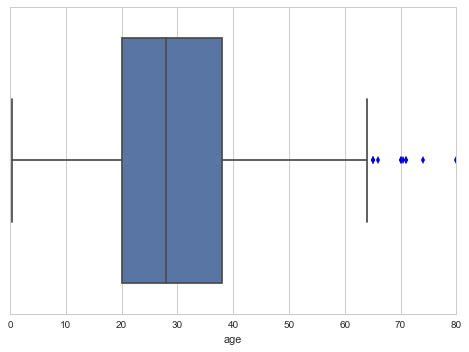

In [6]:
# Bp x/age
sns.boxplot(data=df, x='age')

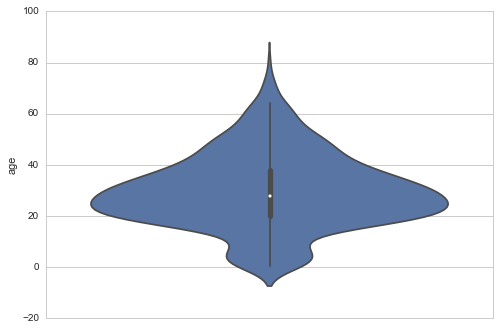

In [8]:
# Vp y/age
sns.violinplot(data=df, y='age')

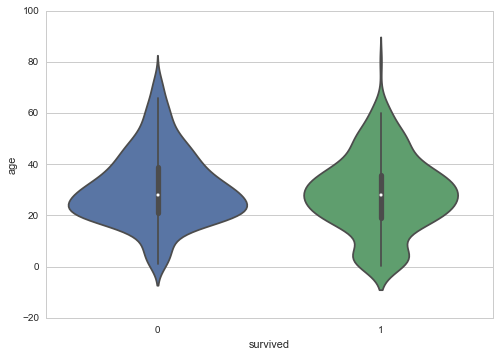

In [9]:
# Vp y/age x/survived
sns.violinplot(data=df, y='age', x='survived')

In [10]:
# Get Med
age_median = df['age'].median()
age_median

28.0

In [11]:
# Fill empt
df['age'] = df['age'].fillna(age_median)

In [12]:
# New feat
df['is_child'] = df['age'] < 8

# Part 3: Train the model

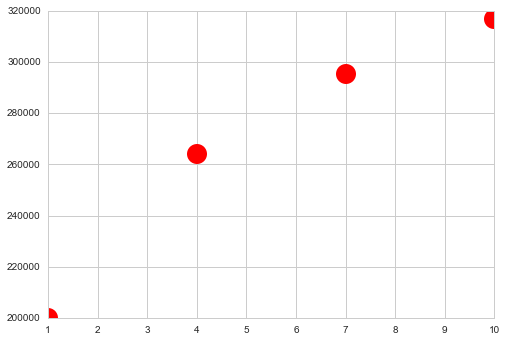

In [13]:
x_from = np.arange(1, 11., 3)
X = x_from[:, np.newaxis]
y = x_from**(.2) * 200000

plt.plot(X, y, 'ro', markersize=20)

In [14]:
Y = A * X^2 + B

NameError: name 'A' is not defined

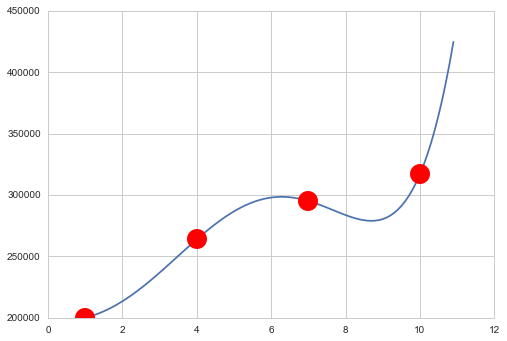

In [16]:
DEGREE = 5

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
        ('polynomial_features', PolynomialFeatures(degree=DEGREE, include_bias=False)),
        ('linear_regression', LinearRegression())
    ])

pipeline.fit(X, y)

x_from_all = np.arange(1., 11., .1)
X_all = x_from_all[:, np.newaxis]

y_all = pipeline.predict(X_all)

plt.plot(X_all, y_all)
plt.plot(X, y, 'ro', markersize=20, linewidth=5)

# Part 4: Does Jack survive ?

In [19]:
# Split features and target (fare/is_child -> survived)
X = df[['fare', 'is_child']]
y = df['survived']

In [20]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
X_Jack = pd.DataFrame([{
    'fare': 20,
    'is_child': False
}])

y_Jack = lr.predict(X_Jack)

jack_is_alive = y_Jack[0]

from IPython.display import Image

if jack_is_alive:
    url='alive.gif'
else:
    url='dead.gif'
    
Image(url=url)